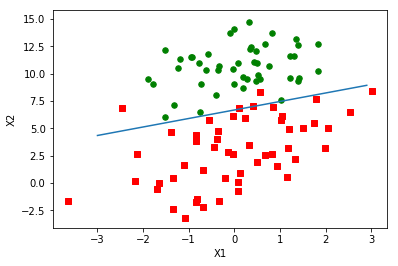

In [9]:
#!/usr/bin/env python

# -*- encoding: utf-8

'''
                      ______   ___  __
                     / ___\ \ / / |/ /
                    | |    \ V /| ' / 
                    | |___  | | | . \ 
                     \____| |_| |_|\_\
 ==========================================================================
@author: Yekun Chai

@license: School of Informatics, Edinburgh

@contact: chaiyekun@gmail.com

@file: Ch5_LR.py

@time: 24/10/2018 12:55 

@desc：       
               
'''
import numpy as np


def loadDataSet():
    dataMat = []
    labelMat = []
    with open(file='data/Ch05/testSet.txt') as f:
        for line in f.readlines():
            lineArr = line.strip().split()
            # 第一个值为 1.0 ，dot(X, W^T)  第一列1 对应 bias （MLPR内容）
            dataMat.append([1.0, float(lineArr[0]), float(lineArr[1])])
            labelMat.append(int(lineArr[2]))
    return dataMat, labelMat


def sigmoid(inX):
    return 1.0 / (1 + np.exp(-inX))

# 梯度上升法
def gradAscent(dataMatIn, classLabels):
    # 转换为numpy矩阵类型
    dataMatrix = np.mat(dataMatIn)
    labelMat = np.mat(classLabels).transpose()
    m, n = np.shape(dataMatrix)
    alpha = .001
    maxCycles = 500
    weights = np.ones((n, 1))
    for k in range(maxCycles):
        # np.mat * 为矩阵乘法
        h = sigmoid(dataMatrix * weights)
        error = labelMat - h
        weights = weights + alpha * dataMatrix.T * error
    return weights


def plotBestFit(weights):
    import matplotlib.pyplot as plt
    %matplotlib inline
    dataMat, labelMat = loadDataSet()
    dataArr = np.array(dataMat)
    n = np.shape(dataArr)[0]
    xcord1, ycord1 = [], []
    xcord2, ycord2 = [], []
    for i in range(n):
        if int(labelmat[i]) == 1:
            xcord1.append(dataArr[i,1])
            ycord1.append(dataArr[i,2])
        else:
            xcord2.append(dataArr[i, 1])
            ycord2.append(dataArr[i, 2])

    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(xcord1, ycord1, s=30, c='red', marker='s')
    ax.scatter(xcord2, ycord2, s=30, c='green')
    x = np.arange(-3.0, 3.0, 0.1)
    y = (-weights[0]-weights[1]*x) / weights[2]
    ax.plot(x, y)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()


if __name__ == '__main__':
    dataArr, labelmat = loadDataSet()
    w = gradAscent(dataArr, labelmat)
    # print(w)
    plotBestFit(weights=w.getA())

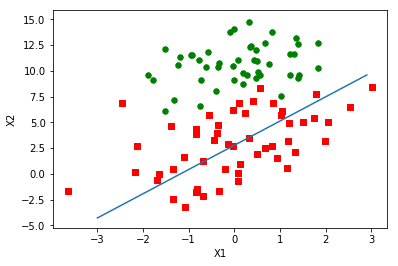

In [10]:
def stocGradAscent0(dataMatrix, classLabels):
    m, n = np.shape(dataMatrix)
    alpha = .01
    weights = np.ones(n)
    for i in range(m):
        h = sigmoid(sum(dataMatrix[i] * weights))
        error = classLabels[i] - h
        weights = weights + alpha * error * dataMatrix[i]
    return weights

dataArr, labelmat = loadDataSet()
w1 = stocGradAscent0(np.array(dataArr), labelmat)
plotBestFit(weights=w1)

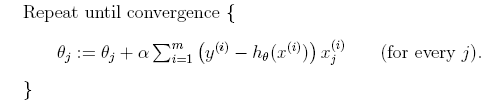

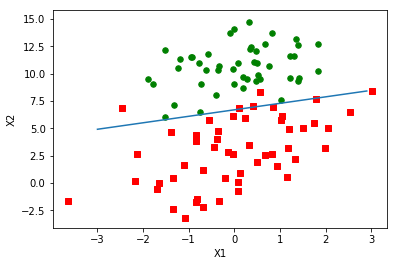

In [8]:
# 改进 SGA
import random
def stocGradAscent1(dataMatrix, classLabels, numIter=150):
    m, n = np.shape(dataMatrix)
    weights = np.ones(n)
    for j in range(numIter):
        dataIndex = list(range(m))
        for i in range(m):
            # alpha每次调整
            alpha = 4 / (1.0 + j + i) + .01
            # 随机选取样本更新
            randIndex = int(random.uniform(0, len(dataIndex)))
            h = sigmoid(sum(dataMatrix[randIndex] * weights))
            error = classLabels[randIndex] - h
            weights = weights + alpha * error * dataMatrix[randIndex]
            del dataIndex[randIndex]
    return weights

dataArr, labelmat = loadDataSet()
w1 = stocGradAscent1(np.array(dataArr), labelmat)
plotBestFit(weights=w1)